# Logistic Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/main/docs/examples/regression/2-logistic-regression.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/main/docs/examples/regression/2-logistic-regression.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](http://127.0.0.1:8000/examples/regression/2-logistic-regression)

In [1]:
# Uncomment the next line and run this cell to install sorix
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@main'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import sorix
from sorix.model_selection import train_test_split
from sorix.metrics import classification_report, confusion_matrix
from sorix.nn import Linear, BCEWithLogitsLoss
from sorix.optim import RMSprop, Adam

In [4]:
device = 'cuda' if sorix.cuda.is_available() else 'cpu'
device

✅ GPU basic operation passed
✅ GPU available: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA runtime version: 13000
CuPy version: 14.0.1


'cuda'

In [5]:
data=pd.read_csv("../data/Iris.csv")
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
data['Species'].unique()
data = data[data['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     1            5.1           3.5            1.4           0.2   
1     2            4.9           3.0            1.4           0.2   
2     3            4.7           3.2            1.3           0.2   
3     4            4.6           3.1            1.5           0.2   
4     5            5.0           3.6            1.4           0.2   
..  ...            ...           ...            ...           ...   
95   96            5.7           3.0            4.2           1.2   
96   97            5.7           2.9            4.2           1.3   
97   98            6.2           2.9            4.3           1.3   
98   99            5.1           2.5            3.0           1.1   
99  100            5.7           2.8            4.1           1.3   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
95  Iris-versicolor  
96  Iris-versicolor  
97  Iris-versicolor  
98  Iris-versicolor  
99  Iris-versicolor  

[100 rows x 6 columns]

In [7]:
labels2id = {label: i for i, label in enumerate(data['Species'].unique())}
id2labels = {i: label for i, label in enumerate(data['Species'].unique())}

In [8]:
data['labels']=data['Species'].map(labels2id)
data = data[data['labels'].isin([0,1])]
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0

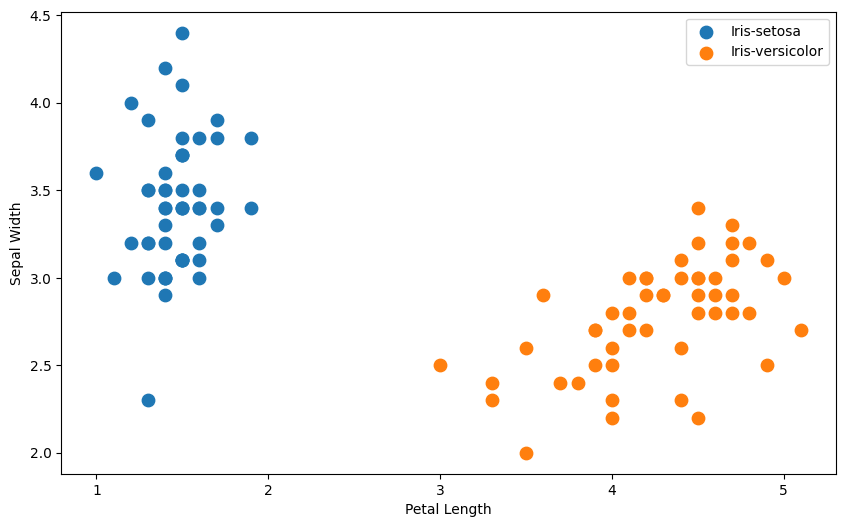

In [9]:
plt.figure(figsize=(10,6))
for specie in data['Species'].unique():
    specie_data = data[data['Species'] == specie]
    plt.scatter(specie_data['PetalLengthCm'],specie_data['SepalWidthCm'],s=80 ,label=specie )
    plt.legend()
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Width")

In [10]:
independent_features=['PetalLengthCm','SepalWidthCm','PetalWidthCm','SepalLengthCm']
dependent_feature=['labels']

In [11]:

data_train,data_test=train_test_split(data,test_size=0.2)

X_train=sorix.tensor(data_train[independent_features],device=device)
Y_train=sorix.tensor(data_train[dependent_feature],device=device)

X_test=sorix.tensor(data_test[independent_features],device=device)
Y_test=sorix.tensor(data_test[dependent_feature],device=device)

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

(sorix.Size([80, 4]),
 sorix.Size([80, 1]),
 sorix.Size([20, 4]),
 sorix.Size([20, 1]))

In [12]:
model = Linear(4, 1).to(device)

loss_fn = BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=0.01)


In [13]:
for epoch in range(1000+1):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item():.4f}")

Epoch: 0 | Loss: 1.6742
Epoch: 100 | Loss: 0.2143
Epoch: 200 | Loss: 0.1048
Epoch: 300 | Loss: 0.0634


Epoch: 400 | Loss: 0.0433
Epoch: 500 | Loss: 0.0319
Epoch: 600 | Loss: 0.0247
Epoch: 700 | Loss: 0.0198


Epoch: 800 | Loss: 0.0163
Epoch: 900 | Loss: 0.0137
Epoch: 1000 | Loss: 0.0117


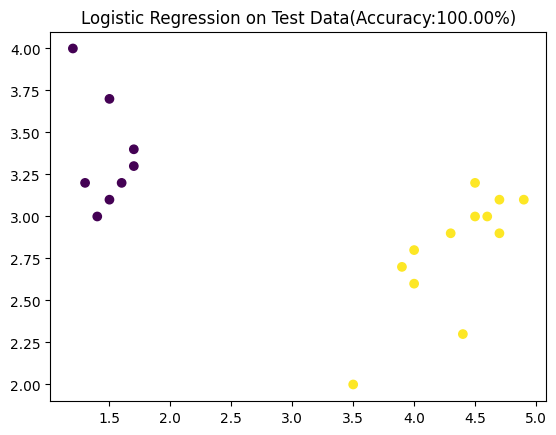

In [14]:
with sorix.no_grad():
    logits = model(X_test)
probs = sorix.sigmoid(logits)
preds = (probs > 0.5).astype('uint8')
acc_test = (preds == Y_test).mean()
plt.scatter(X_test[:,0],X_test[:,1],c=preds)
plt.title(f"Logistic Regression on Test Data(Accuracy:{100*acc_test.item():.2f}%)")
plt.show()

## Save Model

In [15]:
sorix.save(model.state_dict(),"logistic_model.sor")

In [16]:
model2 = Linear(4, 1)
model2.load_state_dict(sorix.load("logistic_model.sor"))
model2.to(device)

Linear(in_features=4, out_features=1, bias=True)

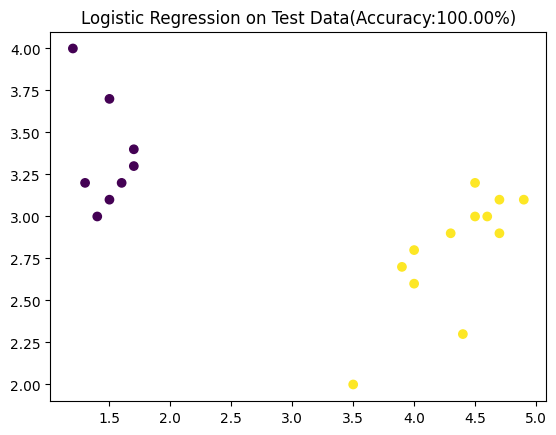

In [17]:
with sorix.no_grad():
    logits = model2(X_test)
probs = sorix.sigmoid(logits)
preds = (probs.data > 0.5).astype('uint8')
acc_test = (preds == Y_test.data).mean()
preds = preds.get() if device == 'cuda' else preds

plt.scatter(X_test[:,0],X_test[:,1],c=preds)
plt.title(f"Logistic Regression on Test Data(Accuracy:{100*acc_test:.2f}%)")
plt.show()